In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.preprocessing import QuantileTransformer

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn import over_sampling

In [77]:
df = pd.read_csv("loan_data_2007_2014.csv")

C:\Users\acer\AppData\Local\Temp\ipykernel_8880\4277137087.py:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("loan_data_2007_2014.csv")


# 1. Data Understanding

## Jumlah baris dan kolom dari dataset

In [78]:
df.shape

(466285, 75)

In [79]:
df.head(5)

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Nama kolom, jumlah kolom yang tidak kosong, dan tipe kolom

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [81]:
# mengatur opsi penampilan pandas
pd.set_option('display.max_rows', None)  # menampilkan semua baris
pd.set_option('display.max_columns', None)  # menampilkan semua kolom

## Jumlah data yang kosong dari tiap kolom

In [82]:
df.isna().sum()

Unnamed: 0                          0
id                                  0
member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
int_rate                            0
installment                         0
grade                               0
sub_grade                           0
emp_title                       27588
emp_length                      21008
home_ownership                      0
annual_inc                          4
verification_status                 0
issue_d                             0
loan_status                         0
pymnt_plan                          0
url                                 0
desc                           340302
purpose                             0
title                              20
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs 

### Penjelasan
* Terdapat kurang lebih 17 kolom yang seluruh barisnya bernilai null sehingga di tahap feature selection kolom ini tidak akan di masukkan.
* Terdapat juga kolom yang nilai null / missing value yang tinggi

## Mengecek apakah satu raw sudah mewakili satu data / peminjam


* Dalam melakukan pengecekan dapat difokuskan pada dua kolom berikut, untuk memastikan apakah satu raw data sudah mewakili satu data peminjam sehingga menghindari data duplikat
1. Kolom `ID` yang berisi daftar kode unik yang di berikan lending company untuk daftar pinjaman.
2. Kolom `member_id` yang berisi ID anggota peminjam.

In [83]:
df.duplicated(subset=['id', 'member_id']).any()

False

### Penjelasan
* Tidak ada nilai duplikat pada kolom id dan member_id yang menandakan bahwa satu rows data telah mewakili satu data peminjam

# 2. Menentukan Label/ Target

    * Dalam goals yang ingin di capai yaitu membuat model untuk memprediksi credit risk maka dalam proses membuat model dibutuhkan label. Sehingga label/target yang digunakan merupakan kolom yang berisi data mengenai status dari peminjam yang mencerminkan kemampuan dari pemimjam tepat waktu atau tidak dalam melakukan pembayaran pinjaman selama ini.

     * Berdasarkan LC Data Dictionary yang diberikan, kolom `loan_status` berisi status pinjaman saat ini. Sehingga kolom ini dapat digunakan sebagai label / target.

In [84]:
df.loan_status.value_counts()

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64




##  Penjelasan Label

1. `Current` artinya pembayaran lancar yang bearti peminjam tepat waktu.
2. `fully paid` artinya pembayaran telah dilakukan lunas dalam kurun waktu tertentu. ([Link sumber](https://kamuslengkap.com/istilah/asuransi/arti-kata/fully-paid-policy))
3. `Charged Off` (ditangguhkan) hal ini terjadi ketika pembayaran pinjaman tidak dilakukan tepat waktu dari persyaratan awal dimana status ini bearti bahwa hutang / pinjaman belum di bayar biasanya selama 180 hari / 6 bulan namun tetap bertanggung jawab secara hukum untuk membayar. ([link sumber](https://www.investopedia.com/terms/c/chargeoff.asp))
4. `late (31-120 days)`, pembayaran telat 2 - 4 bulan dari tanggal seharusnya pinjaman di bayar.
5. `late (16 - 30 days)`, pembayaran telat 16 hari - 1 bulan dari tanggal seharusnya pinjaman di bayar.
6. `In Grade Periode`, artinya masa tenggang yaitu peminjam diberikan batas waktu setelah tanggal jatuh tempo dimana pembayaran dapat dilakukan tanpa penalti seperti biaya keterlambatan atau pembatala pinjaman pada masa tenggang ini. ([Link Sumber](https://kamus.tokopedia.com/m/masa-tenggang/))
7. `Does not meet ther credit policy Status : Fully Paid`, artinya status pemimjam telah lunas melakukan pembayaran tetapi tidak lagi memenuhi persyaratan untuk melakukan pinjaman / kredit.
8. `Does not meet the credit policy Status:Charged Off`, artinya status pemimjam di tangguhkan karena tidak tepat waktu membayar dan tidak dapat memenuhi persyaratan untuk melakukan pinjaman.
9. `Default` , artinya pinjaman gagal di bayar. ([Link Sumber](https://www.bankrate.com/loans/student-loans/what-is-default/#:~:text=Defaulting%20on%20a%20loan%20is,he%20defaults%20on%20the%20loan))
* Notes
* Sehingga dari penjelasan di atas, kolom loan_status dapat di bagi menjadi dua yaitu low risk (peminjam dengan resiko rendah tidak bayar) dan high risk (peminjam dengan resiko tinggi tidak bayar). Dengan demikian format isi dari kolom ini dapat di ubah saat melakukan feature enginnering
* Low risk yaitu kategori : `Current` dan `Fully paid`
* High Risk yaitu kategori : `Charged Off` , `late (31-120 days)`, `late (16 - 30 days)`, `In Grade Periode`, `Does not meet ther credit policy Status : Fully Paid`, `Does not meet the credit policy Status:Charged Off` , dan `Default` 

# 3. Exploratory Data Analysis (1)

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

## Melakukan Descriptive Statistics

### a) describe()

In [86]:


df.head(5)

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [87]:
df.describe()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,466285.000000,4.662850e+05,4.662850e+05,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,4.662810e+05,466285.000000,466256.000000,466256.000000,215934.000000,62638.000000,466256.000000,466256.000000,4.662850e+05,465945.000000,466256.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466140.000000,98974.000000,466285.0,0.0,0.0,0.0,466256.000000,3.960090e+05,3.960090e+05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.960090e+05,0.0,0.0,0.0
mean,233142.000000,1.307973e+07,1.459766e+07,14317.277577,14291.801044,14222.329888,13.829236,432.061201,7.327738e+04,17.218758,0.284678,0.804745,34.104430,74.306012,11.187069,0.160564,1.623020e+04,56.176947,25.064430,4410.062342,4408.452258,11540.686220,11469.892747,8866.014657,2588.677225,0.650129,85.344211,8.961534,3123.913796,0.009085,42.852547,1.0,NaN,NaN,NaN,0.004002,1.919135e+02,1.388017e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.037909e+04,NaN,NaN,NaN
std,134605.029472,1.089371e+07,1.168237e+07,8286.509164,8274.371300,8297.637788,4.357587,243.485550,5.496357e+04,7.851121,0.797365,1.091598,21.778487,30.357653,4.987526,0.510863,2.067625e+04,23.732628,11.600141,6355.078769,6353.198001,8265.627112,8254.157579,7031.687997,2483.809661,5.265730,552.216084,85.491437,5554.737393,0.108648,21.662591,0.0,NaN,NaN,NaN,0.068637,1.463021e+04,1.521147e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.724713e+04,NaN,NaN,NaN
min,0.000000,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN
25%,116571.000000,3.639987e+06,4.379705e+06,8000.000000,8000.000000,8000.000000,10.990000,256.690000,4.500000e+04,11.360000,0.000000,0.000000,16.000000,53.000000,8.000000,0.000000,6.413000e+03,39.200000,17.000000,0.000000,0.000000,5552.125349,5499.250000,3708.560000,957.280000,0.000000,0.000000,0.000000,312.620000,0.000000,26.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,2.861800e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.350000e+04,NaN,NaN,NaN
50%,233142.000000,1.010790e+07,1.194108e+07,12000.000000,12000.000000,12000.000000,13.660000,379.890000,6.300000e+04,16.870000,0.000000,0.000000,31.000000,76.000000,10.000000,0.000000,1.176400e+04,57.600000,23.000000,441.470000,441.380000,9419.250943,9355.430000,6817.760000,1818.880000,0.000000,0.000000,0.000000,545.960000,0.000000,42.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,8.153900e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.280000e+04,NaN,NaN,NaN
75%,349713.000000,2.073121e+07,2.300154e+07,20000.000000,20000.000000,19950.000000,16.490000,566.580000,8.896000e+04,22.780000,0.000000,1.000000,49.000000,102.000000,14.000000,0.000000,2.033300e+04,74.700000,32.000000,7341.650000,7338.390000,15308.158460,15231.310000,12000.000000,3304.530000,0.000000,0.000000,0.000000,3187.510000,0.000000,59.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,2.089530e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

#### Penjelasan Data Numerik
    Penentukan data numerik Berdasarkan .info(). Dengan analisa ini dapat mengetahui data yang tidak penting dan memiliki format yang tidak tepat.
* `Unnamed : 0` merupakan kolom tidak penting karena berisi penomoran baris.
* `Id` dan `Member_id` merupakan kolom bernilai unik per rows data.
* Terdapat 17 kolom yang bernilai nan secara keseluruhan descriptive statistic sehingga saat feature selection sebaiknya di drop.

In [88]:
df.describe(include=['object'])

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,next_pymnt_d,last_credit_pull_d,application_type
count,466285,466285,466285,438697,445277,466285,466285,466285,466285,466285,466285,125983,466285,466265,466285,466285,466256,466285,465909,239071,466243,466285
unique,2,7,35,205475,11,6,3,91,9,2,466285,124436,14,63099,888,50,664,2,98,100,103,1
top,36 months,B,B3,Teacher,10+ years,MORTGAGE,Verified,Oct-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,,debt_consolidation,Debt consolidation,945xx,CA,Oct-00,f,Jan-16,Feb-16,Jan-16,INDIVIDUAL
freq,337953,136929,31686,5399,150049,235875,168055,38782,224226,466276,1,234,274195,164075,5304,71450,3674,303005,179620,208393,327699,466285


#### Penjelasan Data Kategorik
* kolom `term` memiliki nilai unik yang 2 yaitu 36 - 60 bulan sebaiknya di ubah menjadi 36 dan 60.
* kolom `emp_length` berdasarkan deskripsi adalah lama pekerjaan yang di jalani 0 tahun hingga 10 tahun lebih. Format penulisaanya sebaiknya di ubah.
* kolom `isue_d`, `earliest_cr_line`, `last_pymnt_d`, `next_pytmnt_d`, `last_credit_pull_d`  memiliki isi format tanggal dan berdasarkan deskripsi tiap kolom kurang membantu untuk mengklasifikasikan peminjam menjadi low dan high risk.
* kolom `grade` dan `subgrade` mungkin nantinya bisa dipilih salah satu saja tapi penentuan hal ini membutuhkan analisa lebih jauh. Penggunaan dua kolom ini digunakan untuk mengklasifikasi peminjam berdasarkan credit risk dimana urutan dari kecil resiko ke resiko besar (A-G) . ([Link Sumber](https://www.bis.org/events/confresearchnetwork1909/lam.pdf))
* kolom `title`, `empt_title`, `url`, `desc`, `zip_code`,   memiliki nilai unik yangsangat banyak sehingga tidak perlu di gunakan.
* kolom `application_type` hanya memiliki 1 nilai unique sebaiknya di drop.

# 4.Feature Selection (1)
Pada tahap ini akan melakukan beberapa tahap seperti dibawah ini, keputusan yang di ambil dari analisa descriptive statistics di atas dan data understanding yang dilakukan.

Berdasarkan EDA descriptive statistic beberapa kolom akan di drop dengan ketentuan: 
1. Tidak memilih kolom yang missing value semua barisnya. 
2. Tidak mimilih kolom yang nilai unik setiap barisnya.
3. Tidak memilih kolom yang memiliki nilai unik terlalu banyak
4. Nilai unik hanya 1 saja.
5. Tidak memilih kolom yang Tidak / kurang informatif untuk membantu klasifikasi.



Note : Penjelasan lebih detail tentang kolom apa sajanya terdapat di code.


In [89]:


cols_to_drop = [
#mising value pada seluruh baris di kolom
    'annual_inc_joint', 'dti_joint' , 'verification_status_joint', 'open_acc_6m', 'open_il_6m',
    'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 
    'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
# unik setiap baris
    'id', 'member_id', 'Unnamed: 0',
# Nilai unik yang terlalu banyak
    'title', 'emp_title', 'url', 'desc', 'zip_code',
# Nilai unik hanya 1 saja 
    'application_type',
# Kurang informatif / tidak membantu untuk klasifikasi
    'issue_d', 'earliest_cr_line', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d'
]

In [90]:
df.drop(cols_to_drop, inplace=True, axis=1)
     

### b) Univariate Analysis
Analisa ini digunakan untuk melakukan analisis pada setiap kolom secara terpisah untuk melihat distribusi nilai secara detail.

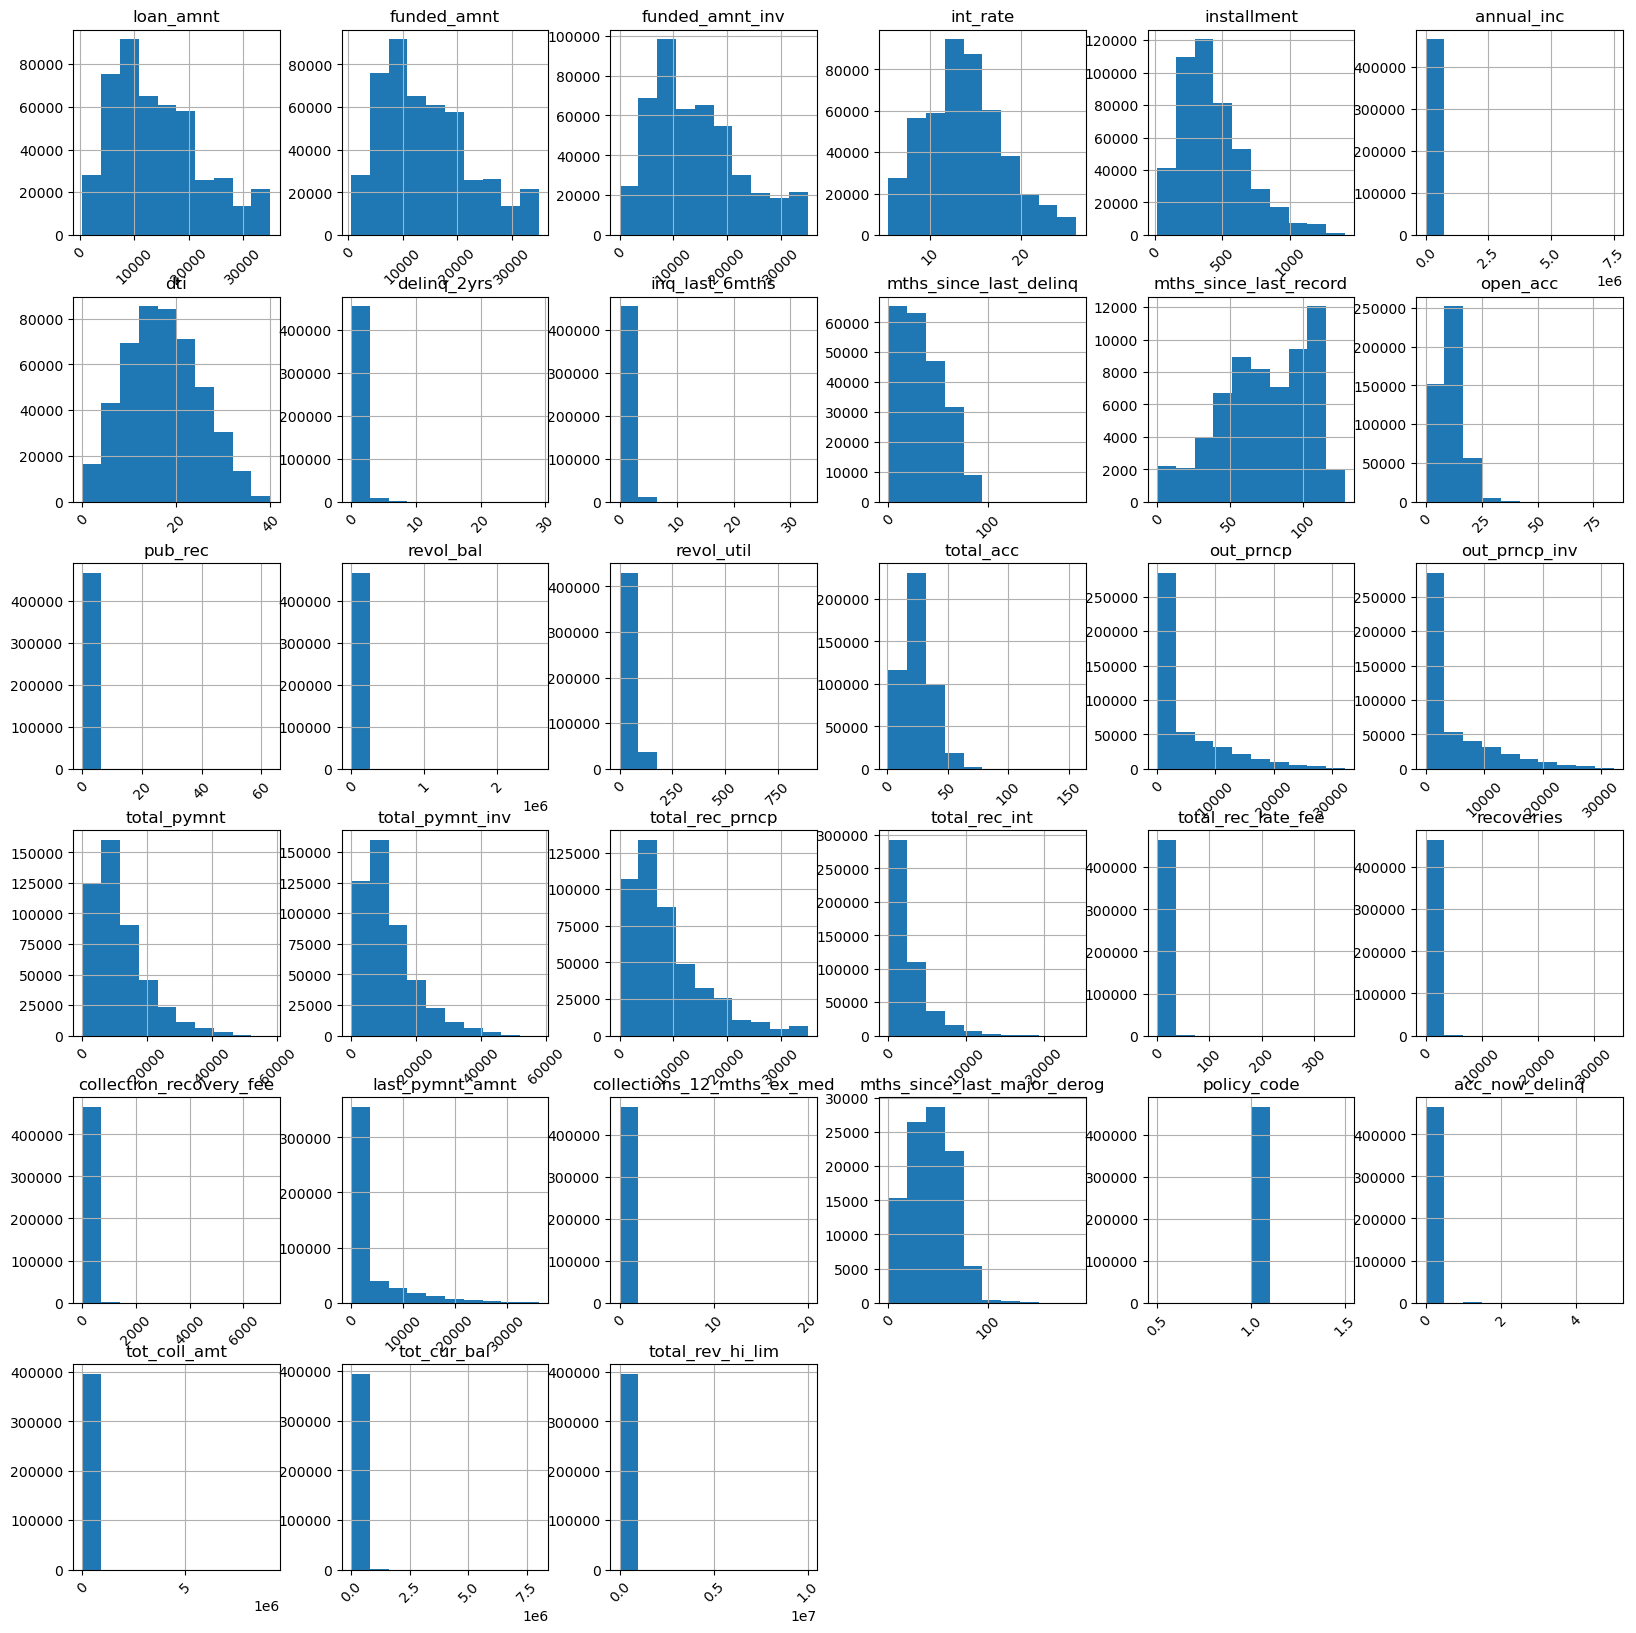

<Figure size 640x480 with 0 Axes>

In [91]:
df.hist(figsize=(20,20), xrot=45)
plt.show()
plt.savefig('univariate analysis.png')

In [92]:
df['policy_code'].unique()

array([1], dtype=int64)

### Penjelasan Univariate Data Numerik
* Beberapa kolom terlihat distribusi positive skewed
* Beberapa kolom terlihat seperti satu kategori tetapi jika di perhatikan nilainya banyak (misal annual_inc , tot_coll_amt, dll)
3. kolom `policy_code` dari distribusi dan pengecekan nilai unik hanya terdiri dari satu nilai maka kolom ini sebaiknya di drop.

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 44 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loan_amnt                    466285 non-null  int64  
 1   funded_amnt                  466285 non-null  int64  
 2   funded_amnt_inv              466285 non-null  float64
 3   term                         466285 non-null  object 
 4   int_rate                     466285 non-null  float64
 5   installment                  466285 non-null  float64
 6   grade                        466285 non-null  object 
 7   sub_grade                    466285 non-null  object 
 8   emp_length                   445277 non-null  object 
 9   home_ownership               466285 non-null  object 
 10  annual_inc                   466281 non-null  float64
 11  verification_status          466285 non-null  object 
 12  loan_status                  466285 non-null  object 
 13 

In [94]:
string_dtypes = [ 'object']
string_df = df.select_dtypes(include=string_dtypes)
string_ = string_df.columns
print("kolom tipe katergorik = ", string_)

kolom tipe katergorik =  Index(['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'verification_status', 'loan_status', 'pymnt_plan', 'purpose',
       'addr_state', 'initial_list_status'],
      dtype='object')


In [95]:
kategorik1 = [ 'term', 'grade', 'sub_grade']
kategorik2 = [ 'emp_length', 'home_ownership', 'verification_status']
kategorik3 = [ 'loan_status', 'pymnt_plan', 'purpose']
kategorik4 = [ 'addr_state', 'initial_list_status']

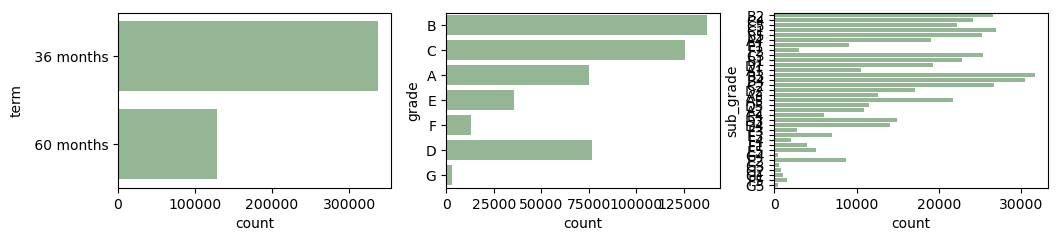

In [96]:
plt.figure(figsize=(12, 5))
for i in range(0, len(kategorik1)):
    plt.subplot(2, len(kategorik1), i+1)
    sns.countplot(y= kategorik1[i], data = df, color='darkseagreen' )
   
    plt.savefig('kat1.png')
plt.show()

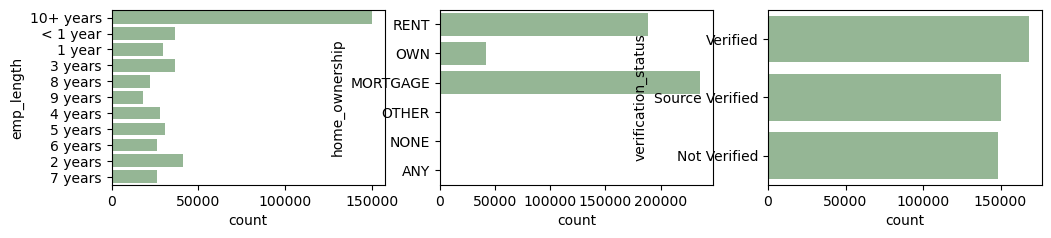

In [97]:
plt.figure(figsize=(12, 5))
for i in range(0, len(kategorik2)):
    plt.subplot(2, len(kategorik2), i+1)
    sns.countplot(y= kategorik2[i], data = df, color='darkseagreen' )
    plt.savefig('kat2.png')
plt.show()

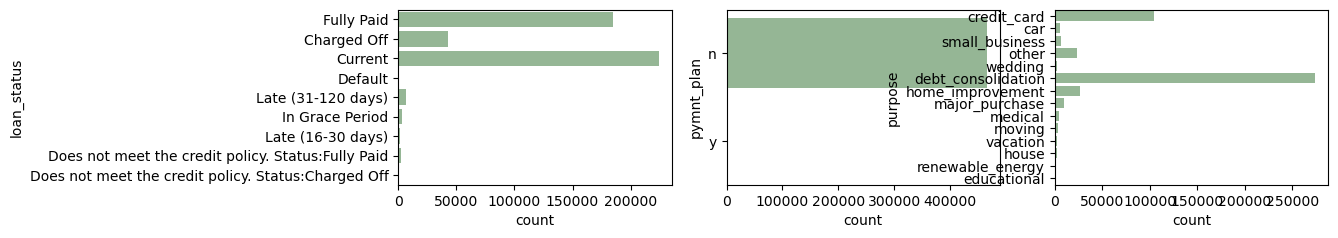

In [98]:
plt.figure(figsize=(12, 5))
for i in range(0, len(kategorik3)):
    plt.subplot(2, len(kategorik3), i+1)
    sns.countplot(y= kategorik3[i], data = df, color='darkseagreen' )
    plt.savefig('kat3.png')
plt.show()

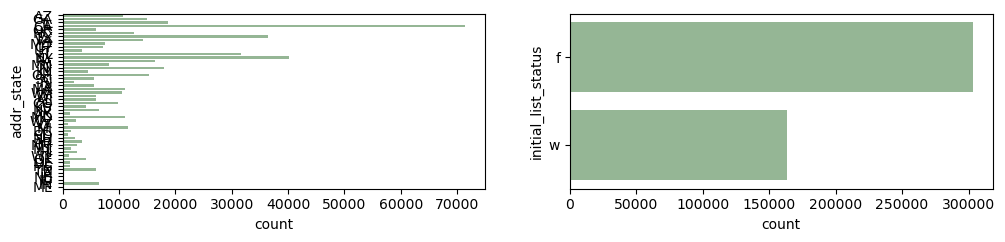

In [99]:
plt.figure(figsize=(12, 5))
for i in range(0, len(kategorik4)):
    plt.subplot(2, len(kategorik4), i+1)
    sns.countplot(y= kategorik4[i], data = df, color='darkseagreen' )
    plt.savefig('kat4.png')
plt.show()

In [100]:
coba = df.groupby('pymnt_plan')['pymnt_plan'].count()
coba

pymnt_plan
n    466276
y         9
Name: pymnt_plan, dtype: int64

In [101]:
home = df.groupby('home_ownership')['home_ownership'].count()
home

home_ownership
ANY              1
MORTGAGE    235875
NONE            50
OTHER          182
OWN          41704
RENT        188473
Name: home_ownership, dtype: int64

In [102]:
alamat = df.groupby('addr_state')['addr_state'].count()
alamat

addr_state
AK     1251
AL     5853
AR     3488
AZ    10712
CA    71450
CO     9739
CT     7204
DC     1426
DE     1272
FL    31637
GA    14975
HI     2487
IA       14
ID       12
IL    18612
IN     6525
KS     4190
KY     4438
LA     5489
MA    11072
MD    10974
ME        4
MI    11549
MN     8158
MO     7508
MS     1226
MT     1396
NC    12682
NE       14
NH     2232
NJ    18061
NM     2588
NV     6519
NY    40242
OH    15237
OK     4117
OR     5949
PA    16424
RI     2050
SC     5583
SD      980
TN     5984
TX    36439
UT     3428
VA    14222
VT      905
WA    10517
WI     5911
WV     2412
WY     1128
Name: addr_state, dtype: int64

### Penjelaan Univariate Kategorik 
* kolom `term` dan `emp_length` untuk tahap selanjutnya dapat di ubah formatnya menjadi angka saja.
* kolom `home_ownership` memiliki 3 kategori yang dominan yaitu mortgage(kredit) , own(memiliki rumah), dan rent (menyewa / kontrak) sedangan 3 kolom lainnya sebaiknya di drop karena jumlahnya sangat tidak seimbang dengan kategori lain dan status kepemilikkannya tidak di ketahui (any dan other).
* kolom `pymnt_plan` memiliki jumlah perkategori yang sangat tidak seimbang sehingga sebaiknya di drop.
* kolom `addr_state` memiliki nilai unik cukup banyak kurang cocok ketika menggunakan one hot encoding dan tidak cocok juga untuk menggunakan label encoding biasa karena data tidak bisa di urutkan. sehingga sebaiknya kolom ini di drop.
* `loan_status` berdasarkan kategori yang ada di kolom ini dapat di bagi menjadi dua yaitu low dan high risk.

# Feature Selection (2)

Berdasarkan Univariate, :
1. Hapus kolom hanya memiliki satu value : `policy_code`
2. Hapus kolom yang kategori didalamnya sangat tidak seimbang `pymnt_plan`
3. Hapus kolom yang kategori didalamnya terlalu banyak dan tidak dapat di urutkan `addr_state`
4. Hapus kolom `grade` hal ini karena terdapat kolom `subgrade` Penggunaan dua kolom ini digunakan untuk mengklasifikasi peminjam berdasarkan credit risk dimana urutan dari kecil resiko ke resiko besar (A-G). Sehingga memilih sub grade karena informasi lebih detail dan menghapus grade. ([Link Sumber](https://www.bis.org/events/confresearchnetwork1909/lam.pdf))

In [103]:
cols_to_drop2 = [
#hapus kolom hanya memiliki satu values
    'policy_code',
# Hapus kolom yang kategori didalamnya sangat tidak seimbang
    'pymnt_plan',
# Hapus kolom yang kategori didalamnya terlalu banyak dan tidak dapat di urutkan
    'addr_state',
# Hapus kolom grade
    'grade'
]
df.drop(cols_to_drop2, inplace=True, axis=1)
     

# Feature Engineering (1)
Tahap ini dilakukan untuk mempersiapkan fitur - fitur dan di lakukan terlebih dahulu dari multivariate analysis untuk melihat kolerasi fitur terhadap label / target

1. kolom `term`  formatnya diubah jadi integer saja.
2. kolom `home_ownership` drop 3 kategori di kolom ini any, none, dan others karena valuesnya terlalu sedikit.
3. kolom `loan status` kategori di kolom ini di kelompokkan menjadi low risk dan hight risk.
4. kolom `emp_

In [104]:
#  kolom 'term' dan tipe data menjadi integer
df['term'] = df['term'].str.replace(' ', '')

# mengubah nilai pada kolom 'term' menjadi integer
df['term'] = df['term'].replace({'36months': 30, '60months': 60})

# mengubah tipe data kolom 'term' menjadi integer
df['term'] = df['term'].astype(int)

In [105]:
#menghapus 3 kategori yang sedikit datanya dari kolom `home_ownership`
df = df.loc[~df['home_ownership'].isin(['OTHER', 'NONE', 'ANY'])].reset_index(drop=True)

In [106]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

loan_status di bagi menjadi low risk = dan high risk = 1
* Low risk yaitu kategori : `Current` dan `Fully paid`
* High Risk yaitu kategori : `Charged Off` , `late (31-120 days)`, `late (16 - 30 days)`, `In Grade Periode`, `Does not meet ther credit policy Status : Fully Paid`, `Does not meet the credit policy Status:Charged Off` , dan `Default` 

In [108]:
# menggabungkan 
# membuat dictionary untuk mapping
mapping = {
    'Fully Paid': 0,
    'Charged Off': 1,
    'Current': 0,
    'Default': 1,
    'Late (31-120 days)': 1,
    'In Grace Period': 1,
    'Late (16-30 days)': 1,
    'Does not meet the credit policy. Status:Fully Paid': 1,
    'Does not meet the credit policy. Status:Charged Off': 1
}

# menggabungkan kategori menjadi Low Risk atau High Risk
df['loan_status'] = df['loan_status'].replace(mapping)

# menampilkan nilai unique dari kolom loan_status setelah digabungkan
print(df['loan_status'].unique())
df['loan_status'] = df['loan_status'].astype(bool)

[False  True]


### c) (Multivariate Analysis)

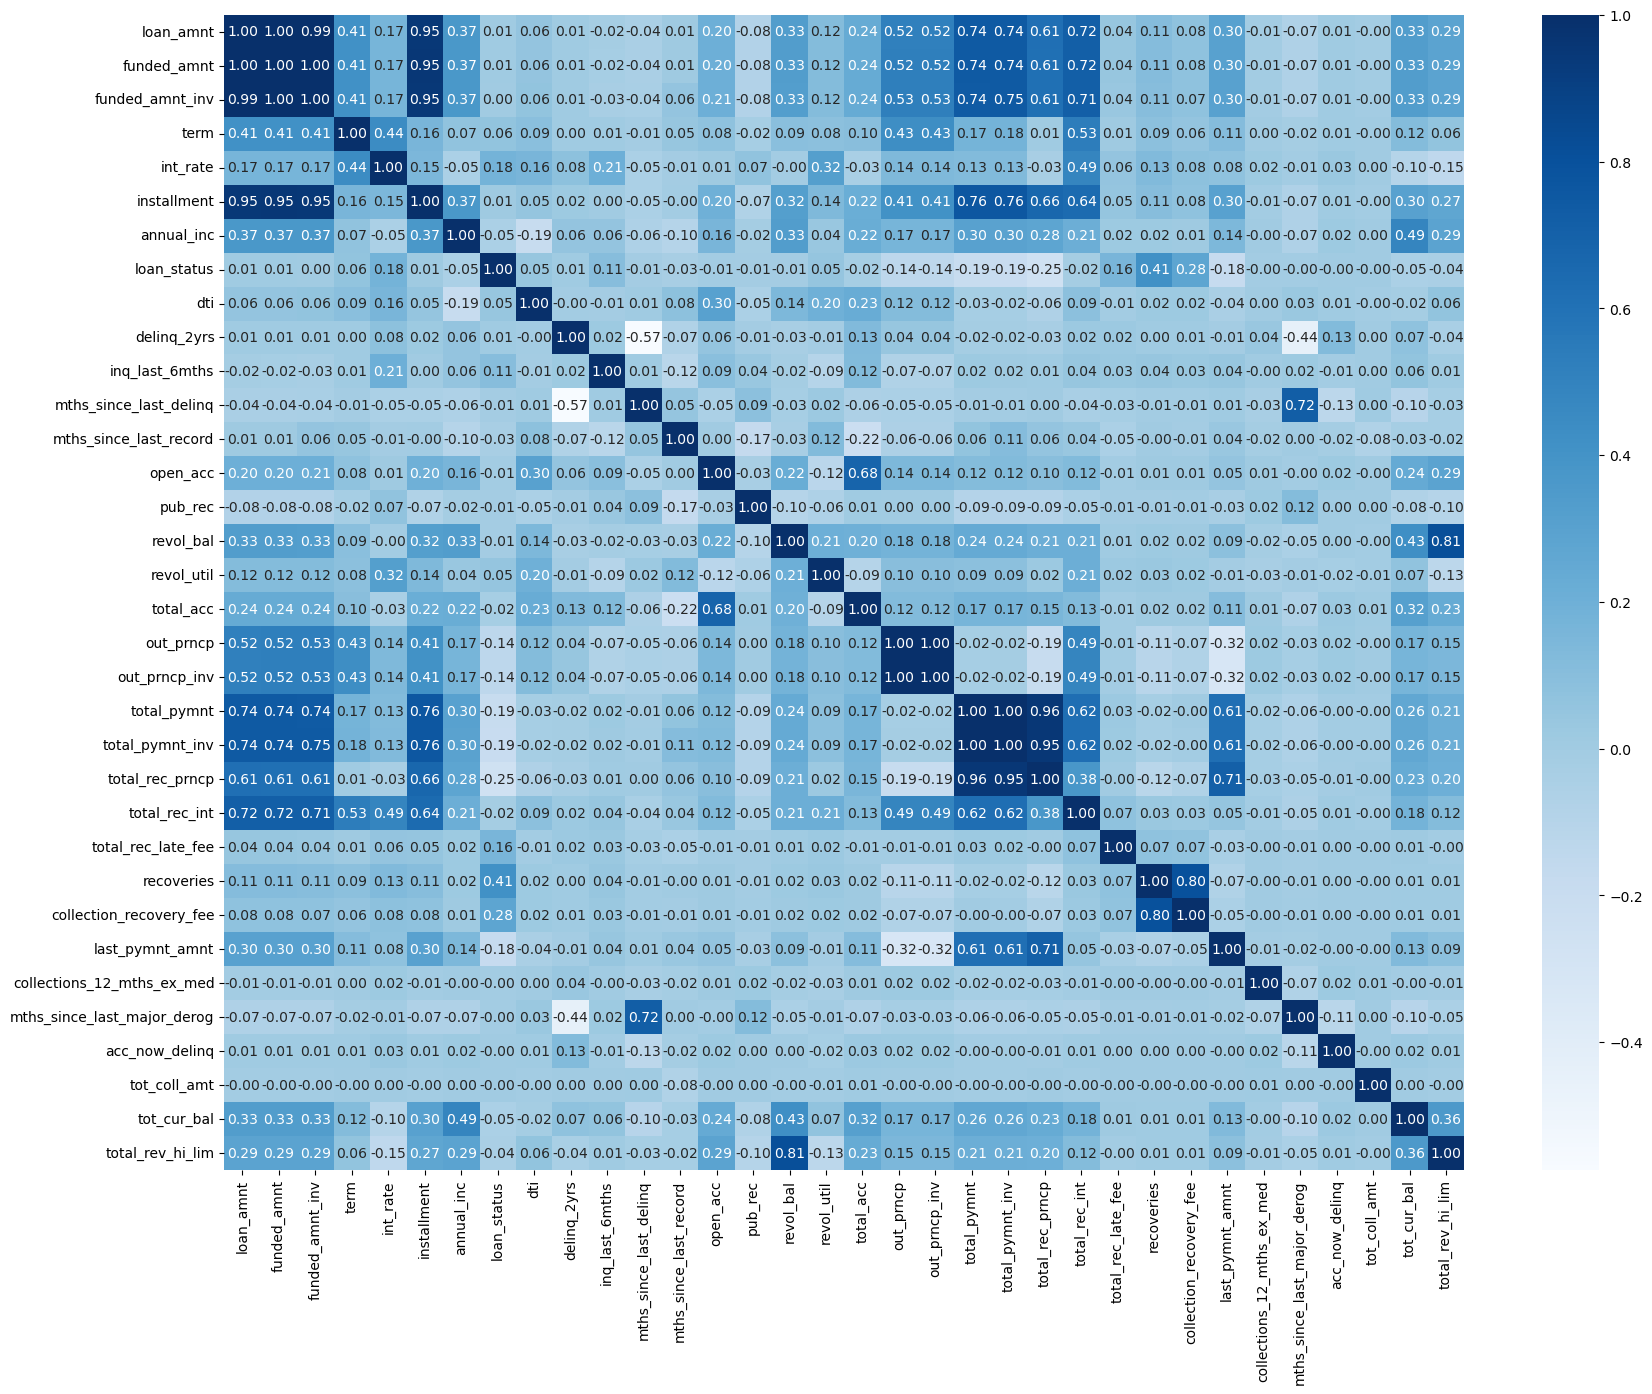

In [109]:
plt.figure(figsize=(20, 15))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')
plt.savefig('korelasi.png')
plt.show()

# Feature Selection (3)
korelasi >=0.80
1.  `funded_amnt` , `loan_amnt` , `funded_amnt_inv` dan `installment` memiliki korelasi yang tinggi jadi cukup pilih salah satu dari kolom ini, yaitu `loan_amnt`
2. `revol_bal` dan `total_rev_hi_lim`. Kolom yang dipilih total_rev_hi_lim.
3. out_prncp and out_prncp_inv. Kolom yang dipilih out_prncp
4. total_pymnt, total_pymnt_inv, total_rec_prncp. Kolom yang dipilih total_pymnt
5. collection_recoveries_fee dan recoveries has high correlation. Kolom yang dipilih collection_recoveries_fee.

#### Penjelasan multivariate analysis
1. `funded_amnt` , `loan_amnt` , `funded_amnt_inv` dan `installment` memiliki korelasi yang tinggi jadi cukup pilih salah satu dari kolom ini, yaitu `loan_amnt`

#### Penjelasan multivariate analysis
1. `funded_amnt` , `loan_amnt` , `funded_amnt_inv` dan `installment` memiliki korelasi yang tinggi jadi cukup pilih salah satu dari kolom ini, yaitu `loan_amnt`

In [34]:
cols_to_drop3 = [
    'funded_amnt', 'funded_amnt_inv', 'installment', 'revol_bal', 'out_prncp_inv', 'total_pymnt_inv', 'total_rec_prncp', 'recoveries'

]
df.drop(cols_to_drop3, inplace=True, axis=1)

# Preprocessing

Pada tahap ini akan dilakukan persiapan data seperti berikut ini :
1. Mengatasi missing value
2. Mengatasi duplicate
3. Mengatasi outlier
4. Feature Encoding
5. Split Data train dan test
6. Feature Scaling
7. Class Imbalance


## a) Missing Value

In [35]:
# cek persentasi missing value dari kolom
check_missing = df.isnull().sum() * 100 / df.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

mths_since_last_record         86.561800
mths_since_last_major_derog    78.768893
mths_since_last_delinq         53.692077
tot_coll_amt                   15.047892
tot_cur_bal                    15.047892
total_rev_hi_lim               15.047892
emp_length                      4.506793
revol_util                      0.071666
collections_12_mths_ex_med      0.029825
delinq_2yrs                     0.005364
inq_last_6mths                  0.005364
open_acc                        0.005364
pub_rec                         0.005364
total_acc                       0.005364
acc_now_delinq                  0.005364
dtype: float64

In [36]:
# hapus kolom yang data kosongnya terlalu banyak
drop = ['mths_since_last_record', 'mths_since_last_major_derog', 'mths_since_last_delinq' ]
df.drop(drop, inplace=True, axis=1)

In [37]:
df.isnull().sum()

loan_amnt                         0
term                              0
int_rate                          0
sub_grade                         0
emp_length                    21004
home_ownership                    0
annual_inc                        0
verification_status               0
loan_status                       0
purpose                           0
dti                               0
delinq_2yrs                      25
inq_last_6mths                   25
open_acc                         25
pub_rec                          25
revol_util                      334
total_acc                        25
initial_list_status               0
out_prncp                         0
total_pymnt                       0
total_rec_int                     0
total_rec_late_fee                0
collection_recovery_fee           0
last_pymnt_amnt                   0
collections_12_mths_ex_med      139
acc_now_delinq                   25
tot_coll_amt                  70131
tot_cur_bal                 

In [38]:
# mengisi data kosong
df['tot_coll_amt'].fillna(df['tot_coll_amt'].median(), inplace=True)
df['tot_cur_bal'].fillna(df['tot_cur_bal'].median(), inplace=True)
df['total_rev_hi_lim'].fillna(df['total_rev_hi_lim'].median(), inplace=True)
df['revol_util'].fillna(df['revol_util'].median(), inplace=True)
df['collections_12_mths_ex_med'].fillna(df['collections_12_mths_ex_med'].median(), inplace=True)
df['delinq_2yrs'].fillna(df['delinq_2yrs'].median(), inplace=True)
df['inq_last_6mths'].fillna(df['inq_last_6mths'].median(), inplace=True)
df['open_acc'].fillna(df['open_acc'].median(), inplace=True)
df['pub_rec'].fillna(df['pub_rec'].median(), inplace=True)
df['total_acc'].fillna(df['total_acc'].median(), inplace=True)
df['acc_now_delinq'].fillna(df['acc_now_delinq'].median(), inplace=True)

df['emp_length'].fillna(df['emp_length'].mode()[0], inplace=True)

In [39]:
df.isnull().sum()

loan_amnt                     0
term                          0
int_rate                      0
sub_grade                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
loan_status                   0
purpose                       0
dti                           0
delinq_2yrs                   0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_util                    0
total_acc                     0
initial_list_status           0
out_prncp                     0
total_pymnt                   0
total_rec_int                 0
total_rec_late_fee            0
collection_recovery_fee       0
last_pymnt_amnt               0
collections_12_mths_ex_med    0
acc_now_delinq                0
tot_coll_amt                  0
tot_cur_bal                   0
total_rev_hi_lim              0
dtype: int64

## b) duplicate data
Berdasarkan analisa di awal satu baris data telah mewakili satu peminjam sehingga tidak ada data duplicate

## Mengatasi Outlier

1. buat diagram outlier dulu
2. iqe

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466052 entries, 0 to 466051
Data columns (total 29 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   466052 non-null  int64  
 1   term                        466052 non-null  int32  
 2   int_rate                    466052 non-null  float64
 3   sub_grade                   466052 non-null  object 
 4   emp_length                  466052 non-null  object 
 5   home_ownership              466052 non-null  object 
 6   annual_inc                  466052 non-null  float64
 7   verification_status         466052 non-null  object 
 8   loan_status                 466052 non-null  bool   
 9   purpose                     466052 non-null  object 
 10  dti                         466052 non-null  float64
 11  delinq_2yrs                 466052 non-null  float64
 12  inq_last_6mths              466052 non-null  float64
 13  open_acc      

In [41]:
# list nama kolom yang integer dan float
num_dtypes = [ 'int64', 'float64', 'int32']
num_df = df.select_dtypes(include=num_dtypes)
nums = num_df.columns
print("kolom tipe numerik =", nums)

kolom tipe numerik = Index(['loan_amnt', 'term', 'int_rate', 'annual_inc', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_util', 'total_acc',
       'out_prncp', 'total_pymnt', 'total_rec_int', 'total_rec_late_fee',
       'collection_recovery_fee', 'last_pymnt_amnt',
       'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'total_rev_hi_lim'],
      dtype='object')


In [42]:
nums1 = ['loan_amnt', 'term', 'int_rate', 'annual_inc', 'dti']
nums2 = ['delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_util']
nums3 = ['total_acc','out_prncp', 'total_pymnt', 'total_rec_int', 'total_rec_late_fee']
nums4 = ['collection_recovery_fee', 'last_pymnt_amnt','collections_12_mths_ex_med', 'acc_now_delinq']
nums5 = [ 'tot_coll_amt','tot_cur_bal', 'total_rev_hi_lim']

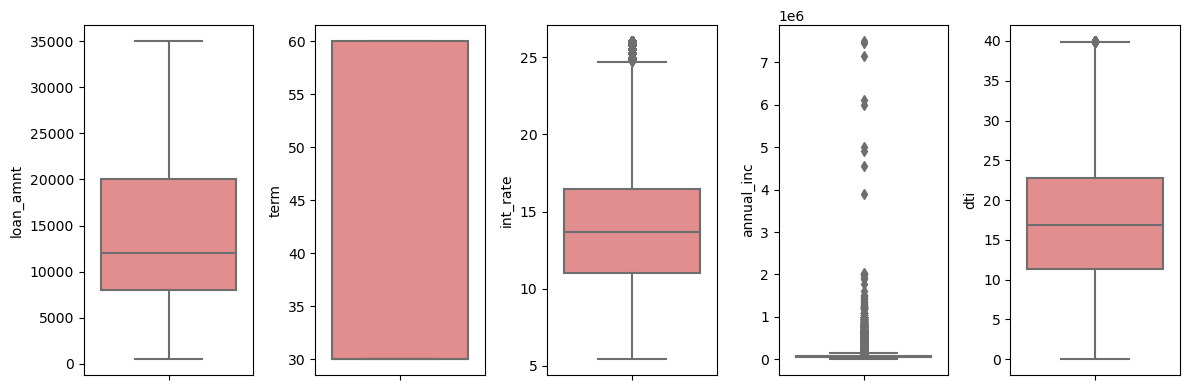

In [43]:
plt.figure(figsize=(12,4))
for i in range(0, len(nums1)):
    plt.subplot(1, len(nums1), i+1)
    sns.boxplot(y=df[nums1[i]], color='lightcoral', orient='v')
    plt.tight_layout()
    #plt.savefig('Distribusi1')

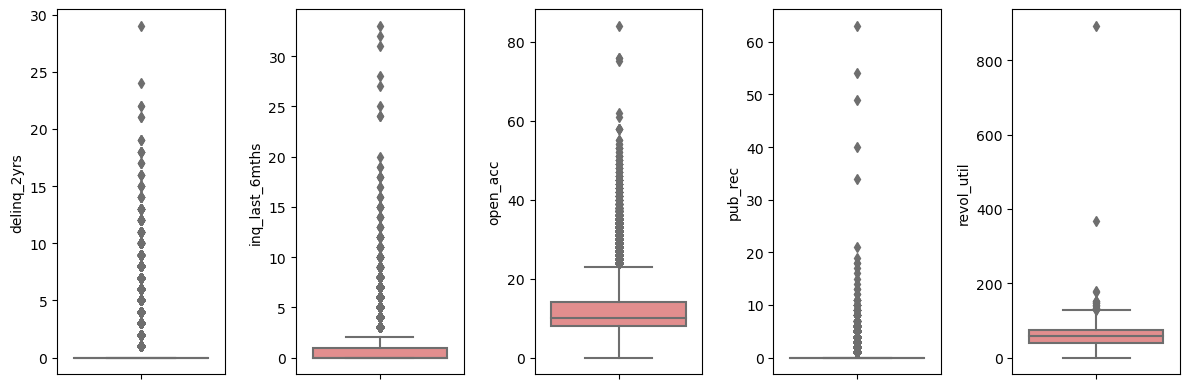

In [44]:
plt.figure(figsize=(12,4))
for i in range(0, len(nums2)):
    plt.subplot(1, len(nums2), i+1)
    sns.boxplot(y=df[nums2[i]], color='lightcoral', orient='v')
    plt.tight_layout()
    #plt.savefig('Distribusi2')

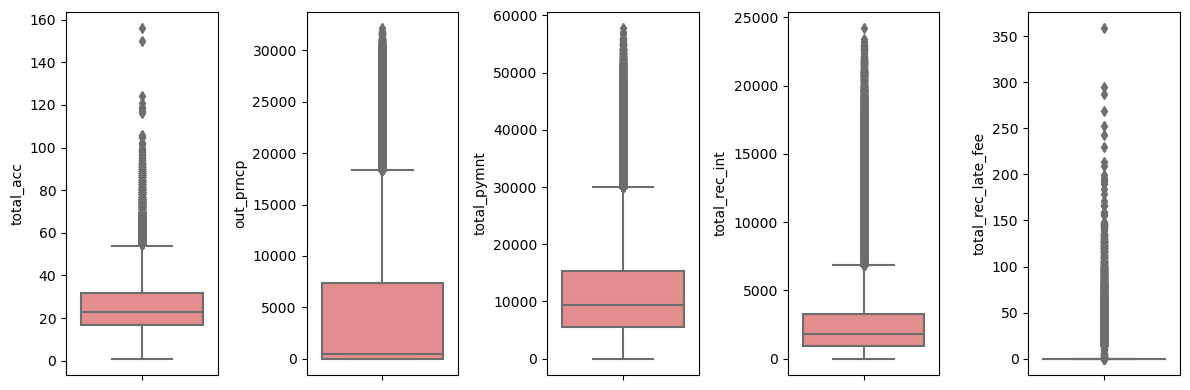

In [45]:
plt.figure(figsize=(12,4))
for i in range(0, len(nums3)):
    plt.subplot(1, len(nums3), i+1)
    sns.boxplot(y=df[nums3[i]], color='lightcoral', orient='v')
    plt.tight_layout()
    #plt.savefig('Distribusi3')

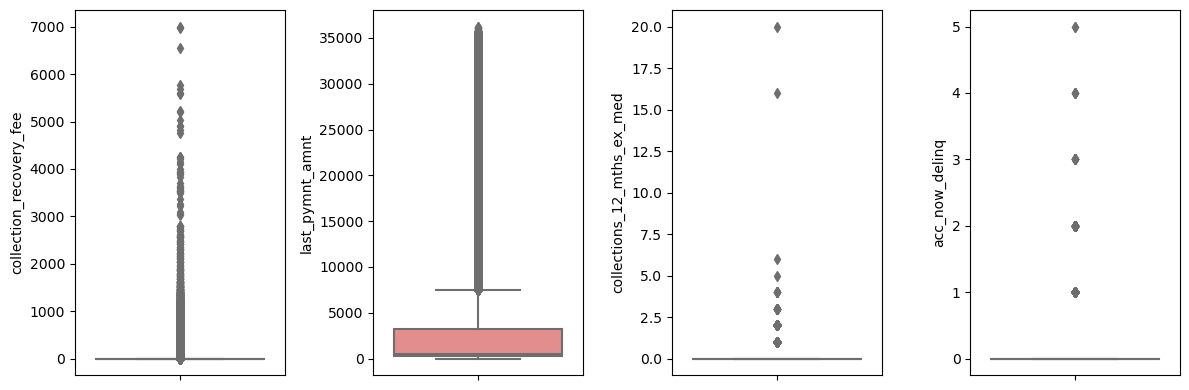

In [46]:
plt.figure(figsize=(12,4))
for i in range(0, len(nums4)):
    plt.subplot(1, len(nums4), i+1)
    sns.boxplot(y=df[nums4[i]], color='lightcoral', orient='v')
    plt.tight_layout()
    #plt.savefig('Distribusi3')

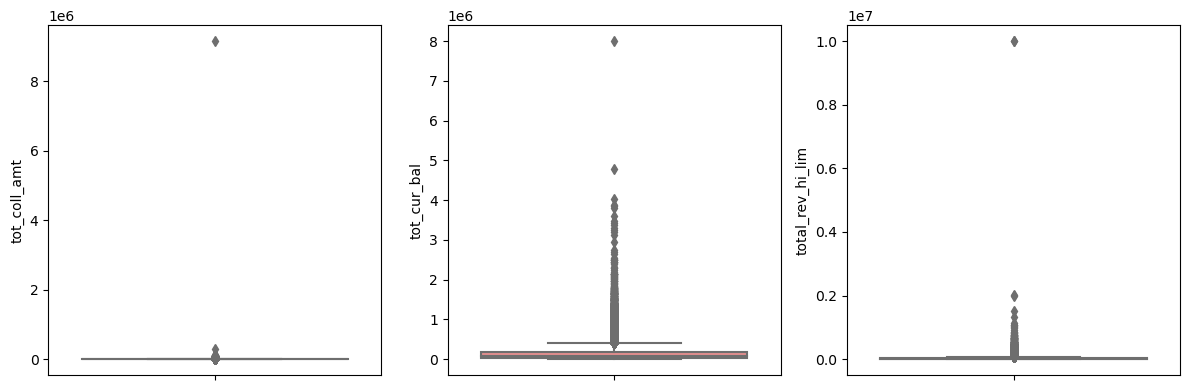

In [47]:
plt.figure(figsize=(12,4))
for i in range(0, len(nums5)):
    plt.subplot(1, len(nums5), i+1)
    sns.boxplot(y=df[nums5[i]], color='lightcoral', orient='v')
    plt.tight_layout()
    #plt.savefig('Distribusi5')

# Penjelasan 
* `annual_inc` berisi pendapatan tahunan dari peminjam, jadi wajar jika terdapat outlier karena pendapatan seseorang itu berbeda- beda tidak ada batas tertentu.
* `delinq_2yrs` berisi 30+ hari tunggakan-tunggakan yang dilakukan peminjaman selama 2 tahun terakhir sehingga outlier. Jumlah 30+ hari tunggakan tunggakan dalam file kredit peminjam selama 2 tahun terakhir. Sehingga seorang peminjam bisa saja memiliki ataupun tidak memiliki tunggakan. Karena model yang digunakan akan memprediksi low dan high risk sehingga outlier pada kolom ini bukan suatu masalah.
* `open_acc` berisi Jumlah jalur kredit terbuka dalam file kredit peminjam. Sehingga outlier bukan masalah disini tidak perlu di hapus.
* `pub_rec` berisi Jumlah catatan publik yang merendahkan/ kurang baik. Sehingga outlier bukan masalah disini.
* `out_pmcp` berisi Sisa pokok pinjaman untuk jumlah total yang didanai. 
* `revo'_util` berisi Tingkat pemanfaatan jalur bergulir, atau jumlah kredit yang digunakan peminjam relatif terhadap semua kredit bergulir yang tersedia. Berdasarkan analisa mean dan median yang angkanya mendekati dan diagram box plot terdapat
* `total_pymnt` berisi Pembayaran diterima hingga saat ini untuk jumlah total yang didanai.
* ` total_rec_int` berisi Bunga diterima sampai saat ini. 
* `total_rec_late_fee` berisi Biaya keterlambatan diterima hingga saat ini
* `collection_recovery_fee` berisi post charge off biaya penagihan.
* `last_pymnt_amnt` berisi Total jumlah pembayaran terakhir yang diterima
* `collections_12_mths_ex_medv` berisi Jumlah koleksi dalam 12 bulan tidak termasuk koleksi medis
* `acc_now_delinq` berisi Jumlah rekening di mana peminjam menunggak sekarang.
* `inq_last_6mnths` berisi Jumlah pertanyaan dalam 6 bulan terakhir (tidak termasuk pertanyaan tentang mobil dan hipotek) bisa saja perusahaan tidak sengaja memberikan pernyataan di waktu berdekataan / sama atau salah input data.
* `tot_coll_amt` berisi Total jumlah penagihan yang pernah terutang
* `tot_cur_bar` berisi Total saldo saat ini dari semua akun
* `total_rev_hi_lim berisi` Total kredit/batas kredit tinggi bergulir

Dari deskripsi penjelasan setiap kolom yang memiliki banyak outlier maka dapat di simpulkan outlier di data tersebut kemungkinan bukan karena adanya kesalahan input data, atau kesalahan pengukuran sehingga tidak di proses.
[Sumber disini](https://www.analyticsvidhya.com/blog/2021/05/why-you-shouldnt-just-delete-outliers/)

# 7. Feature Encoding
Dalam proses ini dibagi menjadi dua yaitu label encoding untuk kolom yang berisi kategori tapi dapat di urutkan dan one hot encoding untuk kolom kategori yang tidak dapat di urutkan.
1. Label Encoding
* kolom `emp_lenght` dan `sub_grade` karena memiliki urutan bisa menggunakan label encoding

2. One Hot Encoding
* kolom `home_ownership` , `verficationa_status`, `purpose` dan `initial_list_status`

In [48]:
#cek kolom kategori apa saja
string_dtypes = [ 'object']
string_df = df.select_dtypes(include=string_dtypes)
string_ = string_df.columns
print("kolom tipe katergorik = ", string_)

kolom tipe katergorik =  Index(['sub_grade', 'emp_length', 'home_ownership', 'verification_status',
       'purpose', 'initial_list_status'],
      dtype='object')


## Label Encoding

In [49]:
# cek kategori apa saja di kolom yang akan di label encoding
df['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years'],
      dtype=object)

In [50]:
df['sub_grade'].unique()

array(['B2', 'C4', 'C5', 'C1', 'B5', 'A4', 'E1', 'F2', 'C3', 'B1', 'D1',
       'A1', 'B3', 'B4', 'C2', 'D2', 'A3', 'A5', 'D5', 'A2', 'E4', 'D3',
       'D4', 'F3', 'E3', 'F4', 'F1', 'E5', 'G4', 'E2', 'G3', 'G2', 'G1',
       'F5', 'G5'], dtype=object)

In [51]:
from sklearn.preprocessing import LabelEncoder
# Label Encoder

# Label Encoder dengan urutan label spesifik
encoder = LabelEncoder()
encoder.classes_ = ['< 1 year', '1 year','2 years', '3 years', '4 years', '5 years', '6 years', '7 years',  '8 years', '9 years', '10+ years' ]

# Transform kolom 'pendidikan' menjadi angka
df['emp_length_int'] = encoder.transform(df['emp_length'])




In [52]:
# Label Encoder dengan urutan label spesifik

encoder = LabelEncoder()
encoder.classes_ =  sorted(df['sub_grade'].unique())
# Transform kolom 'pendidikan' menjadi angka
df['sub_grade_int'] = encoder.transform(df['sub_grade'])

In [53]:
# Drop kolom emp_length dan sub_grade
hapus_ = ['emp_length', 'sub_grade']
df.drop(hapus_, inplace=True, axis=1)

## One hot encoding

In [54]:
df = pd.get_dummies(df, columns=[ 'home_ownership' , 'verification_status', 'purpose','initial_list_status'])

In [55]:
df.isna().sum()

loan_amnt                              0
term                                   0
int_rate                               0
annual_inc                             0
loan_status                            0
dti                                    0
delinq_2yrs                            0
inq_last_6mths                         0
open_acc                               0
pub_rec                                0
revol_util                             0
total_acc                              0
out_prncp                              0
total_pymnt                            0
total_rec_int                          0
total_rec_late_fee                     0
collection_recovery_fee                0
last_pymnt_amnt                        0
collections_12_mths_ex_med             0
acc_now_delinq                         0
tot_coll_amt                           0
tot_cur_bal                            0
total_rev_hi_lim                       0
emp_length_int                         0
sub_grade_int   

# Split Data
Pada tahap ini data akan di bagi menjadi 80% data training dan 20% data testing

In [56]:
 fitur = df.copy()
X = fitur.drop('loan_status', axis=1) 
y = fitur['loan_status']

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Feature Scaling

Dalam feature scaling ini metode yang digunakan dalam pengerjaannya yaitu mengunakan standar scaler yang dilakukan secara terpisah pada data training dan data testing hal ini agar machine learning dapat lebih mudah melakukan proses komputasi dengan menyamakan skala dari data.

In [58]:
df.describe()

,loan_amnt,term,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,out_prncp,total_pymnt,total_rec_int,total_rec_late_fee,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,emp_length_int,sub_grade_int,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_f,initial_list_status_w
count,466052.000000,466052.000000,466052.000000,4.660520e+05,466052.000000,466052.000000,466052.000000,466052.000000,466052.000000,466052.000000,466052.000000,466052.000000,466052.000000,466052.000000,466052.000000,466052.000000,466052.000000,466052.000000,466052.000000,4.660520e+05,4.660520e+05,4.660520e+05,466052.000000,466052.000000,466052.000000,466052.000000,466052.000000,466052.000000,466052.000000,466052.000000,466052.000000,466052.000000,466052.000000,466052.000000,466052.000000,466052.000000,466052.000000,466052.000000,466052.000000,466052.000000,466052.000000,466052.000000,466052.000000,466052.000000,466052.000000,466052.000000
mean,14318.757027,38.259894,13.829315,7.328099e+04,17.219855,0.284653,0.804449,11.187687,0.160619,56.178961,25.065890,4412.125679,11540.469885,2588.776491,0.649341,8.954548,3124.375825,0.009087,0.004004,1.630677e+02,1.301922e+05,2.923945e+04,6.174519,11.064422,0.506113,0.089484,0.404403,0.317819,0.321790,0.360391,0.011574,0.223336,0.588170,0.000895,0.056908,0.004862,0.021071,0.009864,0.006418,0.050773,0.000751,0.015018,0.005336,0.005025,0.649691,0.350309
std,8286.860765,13.400424,4.357916,5.496602e+04,7.850820,0.797377,1.091169,4.987571,0.510953,23.721751,11.600138,6355.840542,8265.507984,2483.685936,5.260420,85.461376,5555.262853,0.108659,0.068652,1.348626e+04,1.416976e+05,3.444026e+04,3.640290,6.529264,0.499963,0.285441,0.490777,0.465629,0.467164,0.480114,0.106957,0.416482,0.492165,0.029899,0.231667,0.069559,0.143620,0.098825,0.079853,0.219535,0.027394,0.121623,0.072855,0.070710,0.477067,0.477067
min,500.000000,30.000000,5.420000,1.896000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8000.000000,30.000000,10.990000,4.500000e+04,11.360000,0.000000,0.000000,8.000000,0.000000,39.200000,17.000000,0.000000,5552.115000,957.380000,0.000000,0.000000,312.640000,0.000000,0.000000,0.000000e+00,3.360275e+04,1.500000e+04,3.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12000.000000,30.000000,13.660000,6.300000e+04,16.870000,0.000000,0.000000,10.000000,0.000000,57.600000,23.000000,455.725000,9418.821936,1818.905000,0.000000,0.000000,545.960000,0.000000,0.000000,0.000000e+00,8.154900e+04,2.280000e+04,7.000000,10.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,20000.000000,60.000000,16.490000,8.900000e+04,22.780000,0.000000,1.000000,14.000000,0.000000,74.700000,32.000000,7347.402500,15307.781383,3304.810000,0.000000,0.000000,3188.770000,0.000000,0.000000,0.000000e+00,1.849852e+05,3.430000e+04,10.000000,15.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0

In [59]:
# Scaling using Standard Scaller
from sklearn import preprocessing
ss = preprocessing.StandardScaler()
x_train_scaled = pd.DataFrame(ss.fit_transform(X_train), columns=X_train.columns)
x_test_scaled = pd.DataFrame(ss.transform(X_test), columns=X_test.columns)

## Handle Class Imbalance

In [60]:
# Cek jumlah data training per class
print(pd.Series(y_train).value_counts())

False    327187
True      45654
Name: loan_status, dtype: int64


In [61]:
len(X_train)

372841

In [62]:
len(X_test)

93211

In [63]:
# Cek jumlah data testing per class
print(pd.Series(y_test).value_counts())

False    81622
True     11589
Name: loan_status, dtype: int64


### `total seluruh data` = 466.052
* Jumlah data training yaitu 372841 dimana 
1. False (low risk) = 327187
2. True (high risk) = 45654

* Jumlah Data testing yaitu 93211 dimana :
1. False (low risk) = 81622
2. True (high risk) = 11589


In [64]:
X_train , y_train = over_sampling.SMOTE().fit_resample(x_train_scaled, y_train)

In [65]:
X_test = x_test_scaled.copy()

In [66]:
# Cek jumlah data training per class
print(pd.Series(y_train).value_counts())

True     327187
False    327187
Name: loan_status, dtype: int64


# Modelling 

In [67]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

def evaluate_model(model, X_train, y_train, X_test, y_test):
    """
    Fungsi untuk menampilkan hasil evaluasi model pada data train dan testing
    
    Parameters:
    model (sklearn estimator): model yang akan dievaluasi
    X_train (numpy array): feature dari data train
    y_train (numpy array): target dari data train
    X_test (numpy array): feature dari data test
    y_test (numpy array): target dari data test
    
    Returns:
    None
    """
    
    # fit model pada data train
    model.fit(X_train, y_train)
    
    # membuat prediksi pada data train dan test
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # menghitung dan menampilkan hasil evaluasi pada data train
    train_acc = accuracy_score(y_train, y_train_pred)
    train_prec = precision_score(y_train, y_train_pred)
    train_recall = recall_score(y_train, y_train_pred)
    train_roc = roc_auc_score(y_train, model.predict_proba(X_train)[:, 1])
    print("Training Accuracy : {:.2f}%".format(train_acc*100))
    print("Training Precision: {:.2f}%".format(train_prec*100))
    print("Training Recall   : {:.2f}%".format(train_recall*100))
    print("Training ROC AUC  : {:.2f}%".format(train_roc*100))
    
    # menghitung dan menampilkan hasil evaluasi pada data test
    test_acc = accuracy_score(y_test, y_test_pred)
    test_prec = precision_score(y_test, y_test_pred)
    test_recall = recall_score(y_test, y_test_pred)
    test_roc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    print("\nTesting Accuracy : {:.2f}%".format(test_acc*100))
    print("Testing Precision: {:.2f}%".format(test_prec*100))
    print("Testing Recall   : {:.2f}%".format(test_recall*100))
    print("Testing ROC AUC  : {:.2f}%".format(test_roc*100))

    # membuat grafik ROC AUC
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, linewidth=2, label="ROC Curve")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (1 - Specificity)', fontsize=12)
    plt.ylabel('True Positive Rate (Sensitivity)', fontsize=12)
    plt.title('ROC Curve', fontsize=16)
    plt.legend(loc='lower right')
    plt.show()


In [68]:
# data scaling X  untuk cross validation 
scaler = StandardScaler()
X = scaler.fit_transform(X)


# Logistic Regression

Training Accuracy : 91.51%
Training Precision: 97.53%
Training Recall   : 85.17%
Training ROC AUC  : 96.78%

Testing Accuracy : 95.43%
Testing Precision: 83.32%
Testing Recall   : 79.07%
Testing ROC AUC  : 94.73%


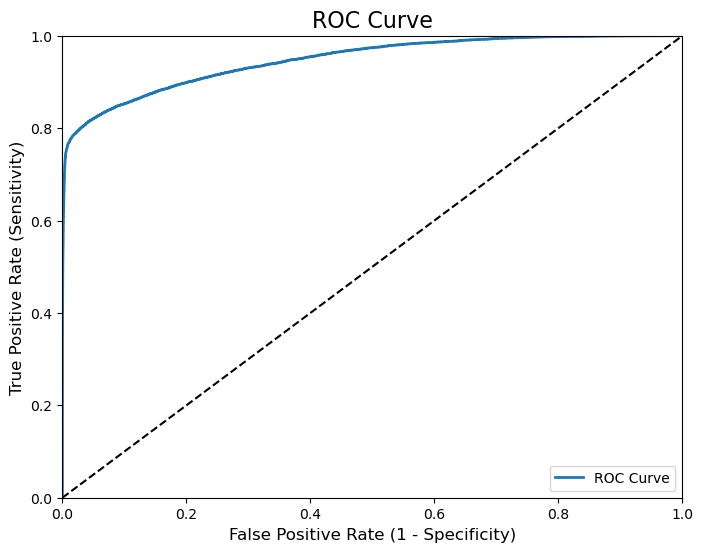

In [75]:
# inisiasi model
from sklearn.linear_model import LogisticRegression
# inisiasi model
logreg = LogisticRegression(max_iter=1000)

# evaluasi model
evaluate_model(logreg, X_train, y_train, X_test, y_test)

In [78]:
from sklearn.model_selection import cross_validate
score = cross_validate(logreg, X, y, cv=5, scoring='roc_auc', return_train_score=True)
print('roc_auc (crossval train): '+ str(score['train_score'].mean()))
print('roc_auc (crossval test): '+ str(score['test_score'].mean()))

roc_auc (crossval train): 0.9471345869875994
roc_auc (crossval test): 0.9223113277756111


## Desicion Tree

Training Accuracy : 100.00%
Training Precision: 100.00%
Training Recall   : 100.00%
Training ROC AUC  : 100.00%

Testing Accuracy : 94.08%
Testing Precision: 73.99%
Testing Recall   : 80.73%
Testing ROC AUC  : 88.35%


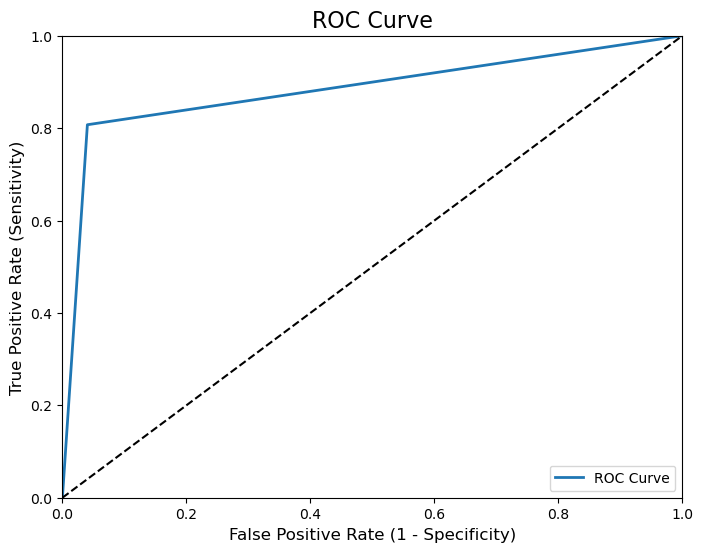

In [79]:
# inisiasi model
from sklearn.tree import DecisionTreeClassifier
# inisiasi model
model_dt = DecisionTreeClassifier()

# evaluasi model
evaluate_model(model_dt, X_train, y_train, X_test, y_test)

In [80]:
from sklearn.model_selection import cross_validate
score = cross_validate(model_dt, X, y, cv=5, scoring='roc_auc', return_train_score=True)
print('roc_auc (crossval train): '+ str(score['train_score'].mean()))
print('roc_auc (crossval test): '+ str(score['test_score'].mean()))

roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.8149859133810418


## Random Forest

Training Accuracy : 100.00%
Training Precision: 100.00%
Training Recall   : 100.00%
Training ROC AUC  : 100.00%

Testing Accuracy : 96.82%
Testing Precision: 96.61%
Testing Recall   : 77.11%
Testing ROC AUC  : 95.51%


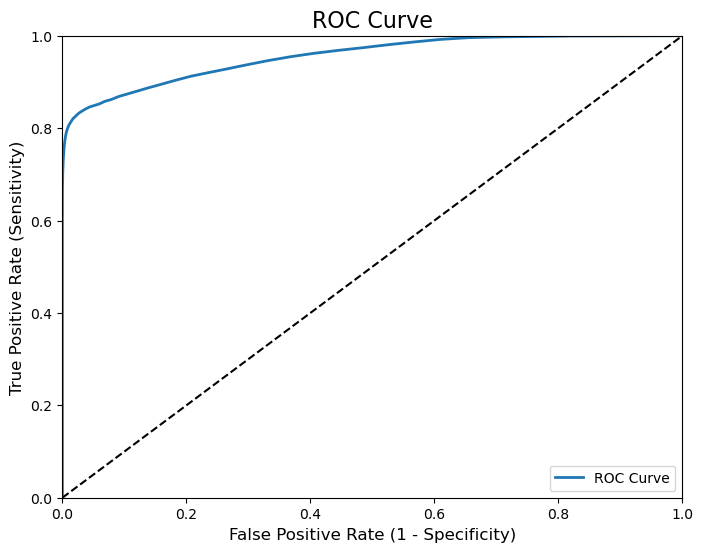

In [81]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
evaluate_model(rfc, X_train, y_train, X_test, y_test)

In [82]:
from sklearn.model_selection import cross_validate
score = cross_validate(rfc, X, y, cv=5, scoring='roc_auc', return_train_score=True)
print('roc_auc (crossval train): '+ str(score['train_score'].mean()))
print('roc_auc (crossval test): '+ str(score['test_score'].mean()))

roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.9132797118123218


## XGB

Training Accuracy : 98.41%
Training Precision: 99.86%
Training Recall   : 96.94%
Training ROC AUC  : 99.63%

Testing Accuracy : 97.19%
Testing Precision: 98.03%
Testing Recall   : 78.97%
Testing ROC AUC  : 96.32%


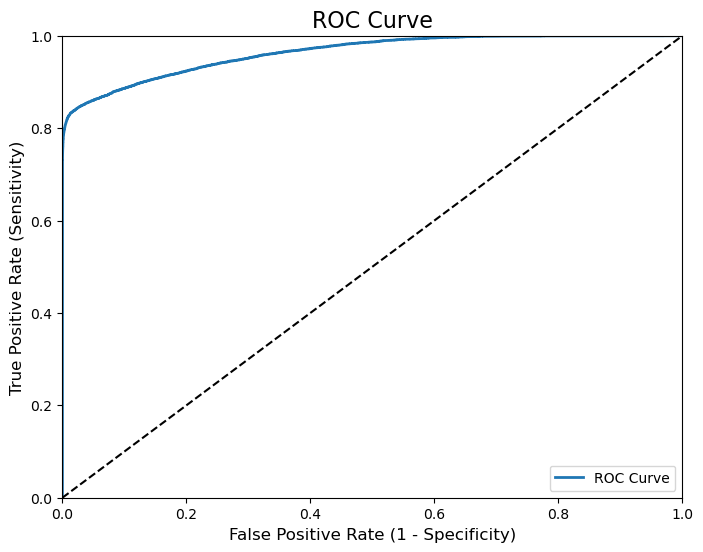

In [83]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
# evaluasi model
evaluate_model(xgb, X_train, y_train, X_test, y_test)

In [84]:
from sklearn.model_selection import cross_validate
score = cross_validate(xgb, X, y, cv=5, scoring='roc_auc', return_train_score=True)
print('roc_auc (crossval train): '+ str(score['train_score'].mean()))
print('roc_auc (crossval test): '+ str(score['test_score'].mean()))

roc_auc (crossval train): 0.9830096252481061
roc_auc (crossval test): 0.8841916803855353


In [70]:
from sklearn.model_selection import cross_validate
from xgboost import XGBClassifier
xgb = XGBClassifier()
score = cross_validate(xgb, X, y, cv=5, scoring='roc_auc', return_train_score=True)
print('roc_auc (crossval train): '+ str(score['train_score'].mean()))
print('roc_auc (crossval test): '+ str(score['test_score'].mean()))

roc_auc (crossval train): 0.9830096252481061
roc_auc (crossval test): 0.8841916803855353


## Ada Boost

Training Accuracy : 91.95%
Training Precision: 95.56%
Training Recall   : 87.98%
Training ROC AUC  : 96.99%

Testing Accuracy : 93.48%
Testing Precision: 72.61%
Testing Recall   : 76.31%
Testing ROC AUC  : 92.92%


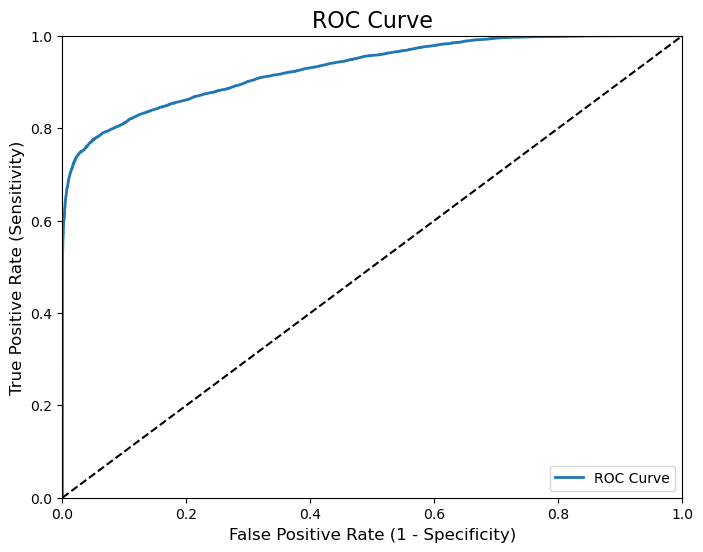

In [85]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier()
evaluate_model(ada_clf, X_train, y_train, X_test, y_test)

In [86]:
from sklearn.model_selection import cross_validate
score = cross_validate(ada_clf, X, y, cv=5, scoring='roc_auc', return_train_score=True)
print('roc_auc (crossval train): '+ str(score['train_score'].mean()))
print('roc_auc (crossval test): '+ str(score['test_score'].mean()))

roc_auc (crossval train): 0.941667247247967
roc_auc (crossval test): 0.9217605942097077


## Extra Treees Classifier

Training Accuracy : 100.00%
Training Precision: 100.00%
Training Recall   : 100.00%
Training ROC AUC  : 100.00%

Testing Accuracy : 96.30%
Testing Precision: 95.32%
Testing Recall   : 73.83%
Testing ROC AUC  : 94.39%


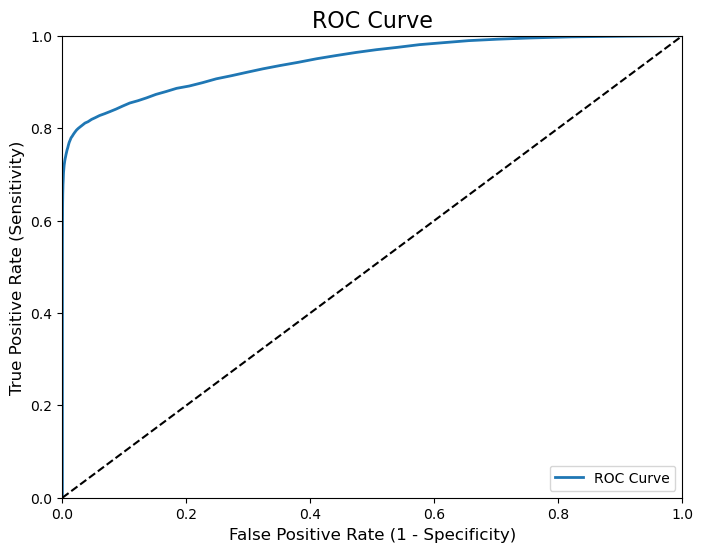

In [87]:
from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier()

evaluate_model(etc, X_train, y_train, X_test, y_test)

In [88]:
from sklearn.model_selection import cross_validate
score = cross_validate(etc, X, y, cv=5, scoring='roc_auc', return_train_score=True)
print('roc_auc (crossval train): '+ str(score['train_score'].mean()))
print('roc_auc (crossval test): '+ str(score['test_score'].mean()))

roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.9057966078953952


## Confusion Matrix Model Terbaik : Longistic Regression

Training Accuracy : 91.54%
Training Precision: 97.56%
Training Recall   : 85.21%
Training ROC AUC  : 96.79%

Testing Accuracy : 95.43%
Testing Precision: 83.39%
Testing Recall   : 79.01%
Testing ROC AUC  : 94.73%


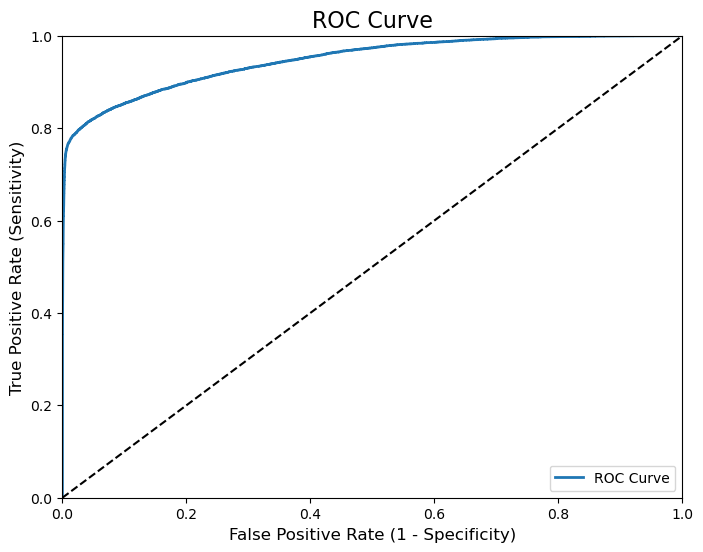

In [69]:
# inisiasi model
from sklearn.linear_model import LogisticRegression
# inisiasi model
logreg = LogisticRegression(max_iter=1000)

# evaluasi model
evaluate_model(logreg, X_train, y_train, X_test, y_test)

In [70]:
from sklearn.model_selection import cross_validate
score = cross_validate(logreg, X, y, cv=5, scoring='roc_auc', return_train_score=True)
print('roc_auc (crossval train): '+ str(score['train_score'].mean()))
print('roc_auc (crossval test): '+ str(score['test_score'].mean()))

roc_auc (crossval train): 0.9471345869875994
roc_auc (crossval test): 0.9223113277756111


In [73]:
y_pred = logreg.predict(X_test)

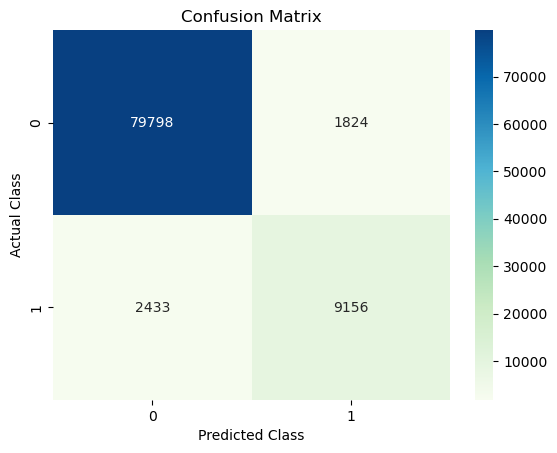

In [74]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='GnBu')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.title('Confusion Matrix')
plt.savefig("confusion matrix")